In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
# Tọa độ của các điểm
x = [ (1, 4), (2, 3), (4, 2), (5, 5)]

x_ot = 2.5 # đường xương sống
weight_x =[-3, 2, 1, 0]
#tạo hai danh sách biến và hình chiếu tương ứng data_ponint, projecton
# danh sach bien
data_point =[]
for i in range(len (x) ):
    data_point.append( (f'x{i+1}',x[i], weight_x[i])) 


#hình chiếu
projections = []

# Tính toán các điểm hình chiếu và đặt tên
for i, point in enumerate(x , start=1):
    # Giữ nguyên y và thay đổi x thành 2.5
    projected_point = (x_ot, point[1])
    projections.append((f"p{i}", projected_point, 0))  # Thêm tuple vào danh sách

print("Danh sách các biến và giá trị của chúng:")
print(data_point) # Tạo danh sách x1, x2, x3

print("Các điểm hình chiếu lên đường thẳng x = 2.5:")
print(projections)

Danh sách các biến và giá trị của chúng:
[('x1', (1, 4), -3), ('x2', (2, 3), 2), ('x3', (4, 2), 1), ('x4', (5, 5), 0)]
Các điểm hình chiếu lên đường thẳng x = 2.5:
[('p1', (2.5, 4), 0), ('p2', (2.5, 3), 0), ('p3', (2.5, 2), 0), ('p4', (2.5, 5), 0)]


In [2]:
# Tạo đồ thị có hướng
G = nx.DiGraph()
# Sắp xếp và lấy tên biến
sorted_proj = sorted(projections, key=lambda item: item[1][1], reverse=True)
sorted_names = [item[0] for item in sorted_proj]
p = sorted_proj
print(p)



[('p4', (2.5, 5), 0), ('p1', (2.5, 4), 0), ('p2', (2.5, 3), 0), ('p3', (2.5, 2), 0)]


In [3]:
# Thêm các đỉnh vào đồ thị và gán trọng số
def add_node (list_of_points):
   for i in range(len(list_of_points)):
      G.add_node(list_of_points[i][0], pos = list_of_points[i][1], weight= list_of_points[i][2] )

add_node (data_point)
add_node (projections)

# Hàm tính khoảng cách Euclid
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


for i in range(len(p)-1):
   G.add_edge(p[i][0], p[i+1][0], weight=euclidean_distance(p[i][1], p[i+1][1]))  # Kết nối p1 với p2, p2 với p3

#Ham noi hinh chieu voi x
def add_canh_proj_x (danh_sach_proj,danh_sach_bien):
   for i in range(len(danh_sach_proj)):
      G.add_edge (danh_sach_proj[i][0], danh_sach_bien[i][0], weight = euclidean_distance(danh_sach_proj[i][1], danh_sach_bien[i][1]))

# Thêm cạnh nối giữa các điểm hình chiếu (tạo thành cây)
add_canh_proj_x(projections, data_point)

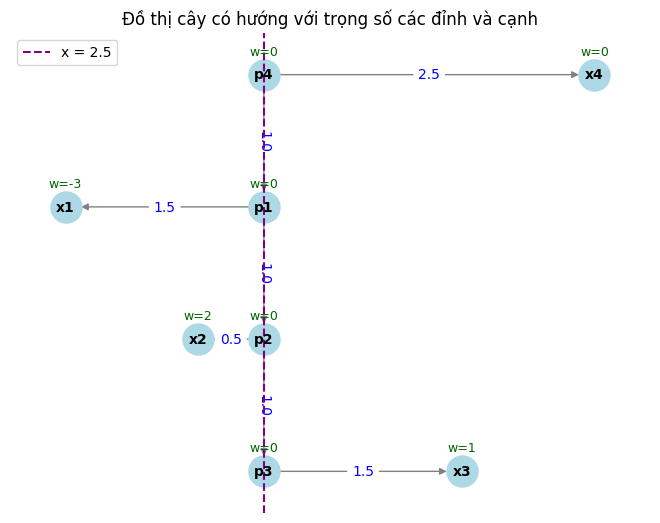

In [4]:



pos = nx.get_node_attributes(G, 'pos') # Lấy vị trí của các đỉnh
edge_labels = nx.get_edge_attributes(G, 'weight') # Lấy trọng số của các cạnh
node_weights = nx.get_node_attributes(G, 'weight') # Lấy trọng số của các đỉnh

# Vẽ đồ thị
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)

# Vẽ trọng số trên các cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

# Vẽ trọng số trên các đỉnh
for node, (x, y) in pos.items():
    plt.text(x, y + 0.15, f'w={node_weights[node]}', fontsize=9, ha='center', color='darkgreen')

# Vẽ đường thẳng x = 2.5
plt.axvline(x=2.5, color='purple', linestyle='--', label='x = 2.5')

# Hiển thị chú thích
plt.legend()

# Đặt tiêu đề cho đồ thị
plt.title("Đồ thị cây có hướng với trọng số các đỉnh và cạnh")

# Hiển thị đồ thị
plt.show()


In [5]:

# Hàm DFS để xác định cây con
def dfs_subtree(graph, start_node):
    visited = set()
    stack = [start_node]
    subtree_nodes = set()

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            subtree_nodes.add(node)
            stack.extend([n for n in graph.successors(node) if n not in visited])

    return subtree_nodes


In [6]:

# Xác định gốc của cây lớn ban đầu (điểm hình chiếu có tung độ lớn nhất)
# Lấy danh sách các nút hình chiếu
projection_nodes = [node for node in G.nodes if node.startswith('p')]

# Xác định gốc của cây lớn ban đầu
root = max(projection_nodes, key=lambda k: G.nodes[k]['pos'][1])
print(f"Gốc của cây lớn ban đầu là: {root}")


# Xác định cây lớn ban đầu có gốc là root (p1)
tree_nodes = dfs_subtree(G, root)
print(f"Các đỉnh của cây lớn có gốc là {root}: {tree_nodes}")

# Xác định cây con có gốc là p3
subtree_root = "p2"
subtree_nodes = dfs_subtree(G, subtree_root)
print(f"Các đỉnh của cây con có gốc là {subtree_root}: {subtree_nodes}")

# Tính tổng trọng số của cây con
subtree_weight = sum(G.nodes[node]['weight'] for node in subtree_nodes)
print(f"Trọng số của cây con có gốc là {subtree_root}: {subtree_weight}")

# In ra độ dài cạnh (p1, x1)
edge_length_p1_x1 = G["p1"]["x1"]["weight"]
print(f"Độ dài cạnh (p1, x1) là: {edge_length_p1_x1}")

# In ra trọng số của các đỉnh x1, x2, x3
print(f"Trọng số của đỉnh x1 là: {G.nodes['x1']['weight']}")

Gốc của cây lớn ban đầu là: p4
Các đỉnh của cây lớn có gốc là p4: {'p4', 'x2', 'x3', 'x1', 'p3', 'x4', 'p1', 'p2'}
Các đỉnh của cây con có gốc là p2: {'x3', 'p2', 'x2', 'p3'}
Trọng số của cây con có gốc là p2: 3
Độ dài cạnh (p1, x1) là: 1.5
Trọng số của đỉnh x1 là: -3


In [7]:
dinh = data_point + projections
ds_dinh = []
for key, value, weight in dinh:
    ds_dinh.append(key)
print(ds_dinh)

['x1', 'x2', 'x3', 'x4', 'p1', 'p2', 'p3', 'p4']


In [8]:
subtree_weight_matrix = []
for subtree_root in ds_dinh:
    subtree_nodes = dfs_subtree(G, subtree_root)
    subtree_weight = sum(G.nodes[node]['weight'] for node in subtree_nodes)
    subtree_weight_matrix.append(subtree_weight)
subtree_weight_matrix = np.array(subtree_weight_matrix)
print("Ma trận trọng số của tất cả các cây con (1 dòng):")
print(subtree_weight_matrix)


Ma trận trọng số của tất cả các cây con (1 dòng):
[-3  2  1  0  0  3  1  0]


In [9]:

# Giả sử bạn đã có đồ thị G và các điểm dữ liệu

# Khởi tạo danh sách edges_order theo thứ tự mong muốn
edges_order = G.edges
print(edges_order)
print('loại dl:', type(edges_order))
print('đỉnh: ', G.nodes)


[('p1', 'p2'), ('p1', 'x1'), ('p2', 'p3'), ('p2', 'x2'), ('p3', 'x3'), ('p4', 'p1'), ('p4', 'x4')]
loại dl: <class 'networkx.classes.reportviews.OutEdgeView'>
đỉnh:  ['x1', 'x2', 'x3', 'x4', 'p1', 'p2', 'p3', 'p4']


In [10]:


# Tạo từ điển để lưu trọng số của các cạnh đi vào từng đỉnh
incoming_weights = {}

# Tính toán trọng số của các cạnh đi vào từng đỉnh
for node in ds_dinh:
    incoming_edges = G.in_edges(node, data=True)  # Lấy các cạnh đi vào đỉnh
    if incoming_edges:  # Nếu có cạnh đi vào
        total_weight = sum(data['weight'] for _, _, data in incoming_edges)
    else:  # Nếu không có cạnh đi vào
        total_weight = 0
    incoming_weights[node] = total_weight
print("Trọng số của các cạnh đi vào từng đỉnh:")
for node, weight in incoming_weights.items():
    print(f"Trọng số cạnh đi vào đỉnh {node}: {weight}")
    # Tạo ma trận với một dòng chứa các trọng số
weights_array = np.array([incoming_weights[node] for node in ds_dinh])

Trọng số của các cạnh đi vào từng đỉnh:
Trọng số cạnh đi vào đỉnh x1: 1.5
Trọng số cạnh đi vào đỉnh x2: 0.5
Trọng số cạnh đi vào đỉnh x3: 1.5
Trọng số cạnh đi vào đỉnh x4: 2.5
Trọng số cạnh đi vào đỉnh p1: 1.0
Trọng số cạnh đi vào đỉnh p2: 1.0
Trọng số cạnh đi vào đỉnh p3: 1.0
Trọng số cạnh đi vào đỉnh p4: 0


In [11]:
print('matran trong so dinh: ', subtree_weight_matrix)
print('ma trsn canh:', weights_array)
subtree_weight_matrix_abs = np.abs(subtree_weight_matrix) # lay gia tri tuyet doi trong so cay
OT= np.dot(weights_array, subtree_weight_matrix_abs.T)
print(OT)

matran trong so dinh:  [-3  2  1  0  0  3  1  0]
ma trsn canh: [1.5 0.5 1.5 2.5 1.  1.  1.  0. ]
11.0
